# Temporal Congruency Experiments

In [1]:
from scripts.imports import *
from scripts.df_styles import df_highlighter

out = Exporter(paths['outdir'], 'clause')

# redefine df_sg to include adverbs
df_sg = df[df.n_times == 1]


In [2]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'head_utf8',
       'funct_type', 'function', 'quality', 'name', 'text', 'n_times',
       'lex_token', 'is_advb', 'tense', 'firstw', 'genre', 'domain', 'gendom',
       'clause', 'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb',
       'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform', 'verb_stem',
       'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'modtag', 'front', 'ph_type',
       'unmodified', 'has_time', 'main_genre', 'APPO', 'DEF', 'ORDN', 'ØPP',
       'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type', 'ADJV',
       'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

# Tense Collocations with tokens

In [3]:
token_ct = df_sg.pivot_table(
    index=['lex_token'],
    columns='verbtense',
    aggfunc='size',
    fill_value=0,
)

# pair down to top tenses
token_ct = token_ct.loc[token_ct.index[token_ct.sum(1) >= 2]]
token_ct = token_ct[token_ct.columns[token_ct.sum(0) >= 2]]

# sorting
token_ct = token_ct.loc[token_ct.sum(1).sort_values(ascending=False).index]

token_ct

verbtense,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
lex_token,,,,,,,,,,,,,,,,,,,,,
מ׳.זמן,1,6,7,1,1,1,0,1,1,0,...,0,137,18,1,1,0,8,0,0,1
ה.זמן,1,20,16,1,0,2,0,6,5,0,...,0,37,3,0,72,7,35,0,8,0
ב.זמן,0,28,17,2,0,0,0,4,5,1,...,0,69,6,0,32,3,8,0,1,1
ב.ה.זמן.הוא,0,53,1,0,1,0,0,0,0,0,...,0,86,1,0,2,0,1,0,0,0
ל.זמן,0,51,9,1,0,0,1,4,3,1,...,1,20,1,0,24,2,6,0,0,0
ב.ה.זמן,0,4,14,0,0,0,0,4,1,0,...,2,56,4,1,20,2,0,0,0,0
זמן,0,10,1,0,0,0,1,1,6,0,...,2,63,1,0,16,0,1,1,0,1
עד.זמן,1,32,6,0,0,0,0,2,5,0,...,0,14,1,0,12,0,4,1,0,2
ב.ה.זמן.ס׳,0,4,4,0,0,0,0,2,1,0,...,0,41,1,1,5,0,0,0,0,0


In [4]:
token_dp = sig.apply_deltaP(token_ct, 0, 1)
token_dp = token_dp.dropna()
token_dp.head()

verbtense,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
lex_token,,,,,,,,,,,,,,,,,,,,,
מ׳.זמן,0.002954,-0.125764,-0.021090,0.001480,0.002954,0.001480,-0.000983,-0.012279,-0.019650,-0.001474,...,-0.006880,0.202269,0.058090,0.001480,-0.132672,-0.009828,-0.035334,-0.001966,-0.005405,0.001480
ה.זמן,0.003300,-0.055649,0.024580,0.001840,-0.001460,0.006601,-0.000973,0.012016,-0.000044,-0.001460,...,-0.006813,-0.224362,-0.007131,-0.002920,0.206962,0.023588,0.096531,-0.001946,0.032728,-0.002920
ב.זמן,-0.001437,0.004246,0.041953,0.008035,-0.001437,-0.002874,-0.000958,0.005533,0.003803,0.004017,...,-0.006705,-0.017828,0.011652,-0.002874,0.040909,0.006784,-0.025333,-0.001916,0.000186,0.002580
ב.ה.זמן.הוא,-0.001422,0.174288,-0.044176,-0.002844,0.004639,-0.002844,-0.000948,-0.016114,-0.023223,-0.001422,...,-0.006635,0.131158,-0.014793,-0.002844,-0.120106,-0.009479,-0.062186,-0.001896,-0.005213,-0.002844
ל.זמן,-0.001404,0.214328,0.013820,0.004239,-0.001404,-0.002808,0.006111,0.012277,-0.001789,0.005643,...,0.000496,-0.244181,-0.013543,-0.002808,0.038569,0.004735,-0.025103,-0.001872,-0.005147,-0.002808


In [5]:
token_fs, token_odds = sig.apply_fishers(token_ct, 0, 1)

In [6]:
token_fs

,?PAST,FUT,IMPV,MOD can,MOD could,MOD is to,MOD lest,MOD let,MOD may,MOD might,...,MOD would,PAST,PAST PERF,PAST PROG,PRES,PRES PART,PRES PERF,PRES PERF PROG,PRES PROG,TO INF
מ׳.זמן,0.526604,-9.756791,-0.812313,0.295293,0.526604,0.295293,0.000000,-0.771728,-1.430939,0.000000,...,-0.410381,9.160211,6.584237,0.295293,-13.364839,-0.806121,-1.558951,0.000000,-0.205668,0.295293
ה.זמן,0.558291,-1.701261,1.002571,0.321668,0.000000,0.926414,0.000000,0.819843,0.000000,0.000000,...,-0.413965,-11.864297,-0.209495,0.000000,15.263207,2.589092,6.356626,0.000000,5.873181,0.000000
ב.זמן,0.000000,0.081093,1.903609,1.041403,0.000000,0.000000,0.000000,0.271938,0.211775,0.617849,...,-0.202800,-0.190572,0.562852,0.000000,1.039674,0.385262,-0.761007,0.000000,-0.000000,0.372378
ב.ה.זמן.הוא,0.000000,8.393379,-2.587886,0.000000,0.663901,0.000000,0.000000,-0.973451,-1.529248,0.000000,...,-0.208248,3.205361,-0.596312,0.000000,-7.758584,-0.401427,-3.820989,0.000000,0.000000,0.000000
ל.זמן,0.000000,10.371845,0.374573,0.470871,0.000000,0.000000,0.891345,0.551928,0.000000,0.729662,...,-0.000000,-9.905014,-0.441636,0.000000,0.798760,0.411799,-0.526794,0.000000,0.000000,0.000000
ב.ה.זמן,0.000000,-3.901746,2.874796,0.000000,0.000000,0.000000,0.000000,0.964127,-0.285740,0.000000,...,0.760785,1.469668,0.527280,0.546169,0.795044,0.529109,-3.369695,0.000000,0.000000,0.000000
זמן,0.000000,-1.108965,-1.370778,0.000000,0.000000,0.000000,0.980446,0.000000,1.349587,0.000000,...,0.766355,3.337163,-0.137017,0.000000,0.109777,-0.206091,-2.210184,0.702572,0.000000,0.549216
עד.זמן,0.840081,4.438394,0.184001,0.000000,0.000000,0.000000,0.000000,0.161374,1.003979,0.000000,...,0.000000,-8.401768,-0.140140,0.000000,-0.179287,-0.206875,-0.618617,0.726010,0.000000,1.476206
ב.ה.זמן.ס׳,0.000000,-2.460854,0.000000,0.000000,0.000000,0.000000,0.000000,0.187040,-0.142197,0.000000,...,0.000000,0.808568,0.000000,0.648231,-1.444419,0.000000,-2.423132,0.000000,0.000000,0.000000
עתה,0.000000,1.445263,0.223149,0.682666,0.959434,0.000000,0.000000,0.000000,-0.585388,0.000000,...,6.603571,-15.232386,-0.385513,0.000000,2.412358,0.000000,6.784680,0.000000,0.000000,0.000000


## PCA Analysis

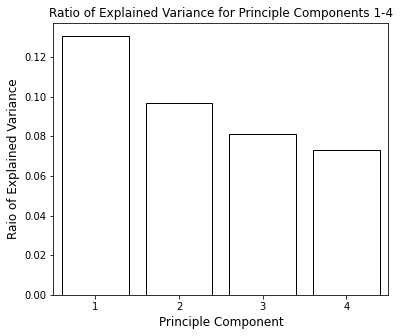

explained variance:
[0.13063602 0.09665987 0.0813742  0.07305675]


In [7]:
vtense_pca, vtense_loadings = apply_pca(token_dp, 0, 1, components=4)

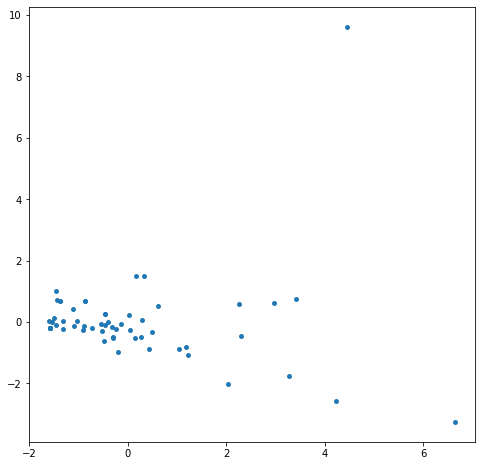

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
x, y = (vtense_pca['PC1'], vtense_pca['PC2'])
ax.scatter(x, y, s=15)

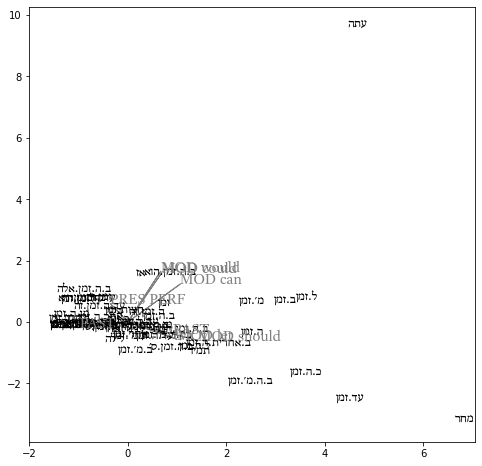

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca.iloc[:,0], vtense_pca.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
for lex_tok in vtense_pca.index:
    tx, ty = vtense_pca.loc[idx[lex_tok]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=12, 
                          fontfamily='SBL Biblit'))
offsets = {}
top_loadings = vtense_loadings.abs().sum().sort_values(ascending=False).index[:8]
texts = []
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))
    
    
out.plot('tense_PCA')

## PCA Analysis (with Fisher's)

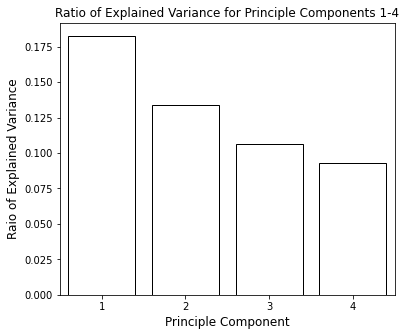

explained variance:
[0.18256244 0.13418387 0.10642403 0.09262396]


In [10]:
vtense_pca2, vtense_loadings2 = apply_pca(token_fs, 0, 1, components=4)

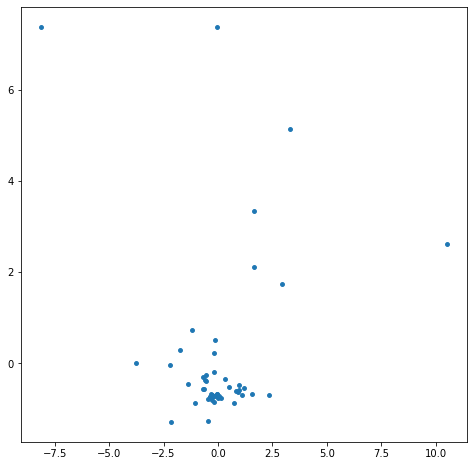

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
x, y = (vtense_pca2['PC1'], vtense_pca2['PC2'])
ax.scatter(x, y, s=15)

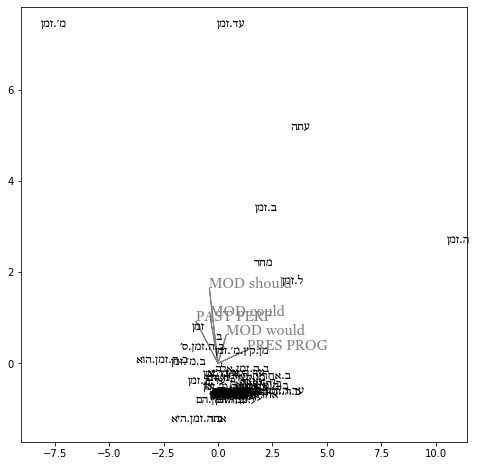

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

s = 70
x, y = (vtense_pca2.iloc[:,0], vtense_pca2.iloc[:,1])
ax.scatter(x, y, facecolor=[], s=2)

texts = []
for lex_tok in vtense_pca2.index:
    tx, ty = vtense_pca2.loc[idx[lex_tok]][:2]
    show_lex = get_display(lex_tok)
    texts.append(plt.text(tx, ty, show_lex, size=12, 
                          fontfamily='SBL Biblit'))
#adjust_text(texts)
#out.plot('pca2_durVSloc_TENSE_text')

offsets = {}
top_loadings2 = vtense_loadings2.abs().sum().sort_values(ascending=False).index[:5]
texts = []
for feature in top_loadings2:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = vtense_loadings2[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, color='#808080', linewidth=1, head_width=0)
    show_text = get_display(feature) # handle bidirectional
    texts.append(plt.text(fx+x_off, fy+y_off, show_text, color='#808080', size=size, fontfamily='SBL Biblit'))

## With Demonstratives (generally)

In [13]:
df_sg.demon_type.value_counts()

THAT    327
THIS    149
Name: demon_type, dtype: int64

In [14]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'head_utf8',
       'funct_type', 'function', 'quality', 'name', 'text', 'n_times',
       'lex_token', 'is_advb', 'tense', 'firstw', 'genre', 'domain', 'gendom',
       'clause', 'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb',
       'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform', 'verb_stem',
       'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'modtag', 'front', 'ph_type',
       'unmodified', 'has_time', 'main_genre', 'APPO', 'DEF', 'ORDN', 'ØPP',
       'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type', 'ADJV',
       'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

In [20]:
demon_ct = df_sg[df_sg.DEMON == 1].pivot_table(
    index=['front', 'demon_type'],
    columns=['verbtense'],
    aggfunc='size',
    fill_value=0,
)

demon_ct

verbtense         ?PRES  FUT  IMPV  MOD could  MOD shall  PAST  PAST PERF  \
front demon_type                                                            
Ø     THAT            0    0     0          0          1     2          0   
      THIS            0    7     2          0          2     3          0   
אחר   THAT            0    1     0          0          0     0          0   
      THIS            0    0     0          0          0     3          0   
ב     THAT            0   61     1          1         41   140          1   
      THIS            0    3     0          0          6     7          0   
כ     THIS            0    0     0          0          0     1          0   
ל+פנה THAT            0    0     0          0          0     1          0   
מן    THAT            0    0     0          0          0     1          0   
      THIS            0    1     0          0          0     0          0   
עד    THAT            0    0     0          0          0     0          3   
      THIS            1    0     0          0          1    14          1   
עתה   THIS            0    0     0          0          0     0          0   

verbtense         PAST PROG  PRES  PRES PERF  PRES PERF PROG  PRES PROG  
front demon_type                                                         
Ø     THAT                0     0          0               0          0  
      THIS                0     2         11               0          0  
אחר   THAT                0     0          0               0          0  
      THIS                0     0          0               0          0  
ב     THAT                2     4          1               0          0  
      THIS                0     3          3               1          1  
כ     THIS                0     0          2               0          0  
ל+פנה THAT                0     0          0               0          0  
מן    THAT                0     0          0               0          0  
      THIS                0     0          0               0          0  
עד    THAT                0     0          1               0          0  
      THIS                0    18         18               0          0  
עתה   THIS                0     1          1               0          0

In [21]:
df_sg[
    (df_sg.verbtense == 'PRES')
    & (df_sg.demon_type == 'THAT')
][['verse', 'clause']]

,verse,clause
node,,
450606,Joshua 20:6,אֲשֶׁ֥ר יִהְיֶ֖ה בַּיָּמִ֣ים הָהֵ֑ם
468695,Isaiah 7:18,וְהָיָ֣ה׀ בַּיֹּ֣ום הַה֗וּא
488574,Zephaniah 1:9,הַדֹּולֵ֛ג עַל־הַמִּפְתָּ֖ן בַּיֹּ֣ום הַה֑וּא
489435,Zechariah 8:6,כִּ֣י יִפָּלֵ֗א בְּעֵינֵי֙ שְׁאֵרִית֙ הָעָ֣ם ה...


## Tense + Verbform + Modifiers

In [22]:
modi_ct = df_sg.pivot_table(
    index=['verbform', 'verbtense'],
    values=['DEF', 'ORDN', 'QUANT', 'PL', 'NUM', 'DEMON', 'SFX', 'unmodified'],
    aggfunc='sum',
    fill_value=0,
)

modi_ct

DEF  DEMON  NUM  ORDN   PL  QUANT  SFX  unmodified
verbform verbtense                                                         
cohoF    FUT               2      1    0     0    2      1    4           3
         MOD let           1      0    0     0    1      0    0           4
         MOD may           0      0    0     0    1      1    1           0
         MOD must          0      0    0     0    0      0    0           0
         MOD would         0      0    0     0    0      0    0           1
impv     IMPV             39      1    7     4   10      4    0          19
jussF    IMPV              1      0    0     0    0      0    0           0
         MOD let           0      0    0     0    1      0    0           1
         MOD may           0      0    0     0    0      0    0           1
         MOD shall         0      0    1     0    1      0    0           0
         MOD should        0      0    0     0    0      0    0           0
         PAST              1      0    0     0    0      0    0           0
ptcp     FUT               7      1    0     0    0      0    0           7
         MOD is to         2      0    1     0    1      0    0           0
         MOD shall         3      2    0     0    0      0    0           0
         MOD would         2      0    0     0    0      0    0           0
         PAST             12      6    1     1    7      2    2           7
         PAST PROG         4      2    0     1    1      0    0           1
         PRES             49      4    0     2    5     10    3          19
         PRES PART         6      0    0     0    1      2    0           4
         PRES PERF         0      0    0     0    1      0    1           1
         PRES PERF PROG    1      1    0     0    3      1    0           0
         PRES PROG         9      1    0     0    1      0    1           1
qtl      FUT               2      0    1     0    1      0    0           7
         IMPV              0      0    0     0    0      0    0           1
         MOD could         1      1    1     0    1      0    0           1
         MOD may           1      0    0     0    1      1    0           0
         MOD shall         1      0    0     0    0      0    0           1
         MOD should        1      0    1     0    1      0    0           0
         MOD would         0      0    0     0    0      0    0           5
         PAST            104     57   72    17  104     18   36          57
         PAST PERF        11      4    8     1   10      1    3           1
         PAST PROG         0      0    1     0    0      0    0           0
         PRES             31      5    0     0    5     11    3          23
         PRES PART         2      0    0     0    0      1    0           0
         PRES PERF        64     28    6     1   13      6    3          40
         PRES PERF PROG    0      0    0     0    0      0    0           1
wayq     ?PAST             1      0    1     0    1      1    0           0
         ?PAST question    0      0    0     0    0      0    0           1
         ?PRES             1      1    0     0    0      0    0           0
         MOD shall         1      0    0     0    0      0    0           0
         PAST            213    106   89    23   91     30    6          40
         PAST PERF         0      0   12     0    1      0    1           0
         PRES             14     11    0     0    0      1    0           1
         PRES PART         0      0    0     0    0      0    0           1
         PRES PERF        11      9    1     0    0      1    0           0
wqtl     FUT              28     19    6     1    9      5    3           9
         FUT PROG          1      0    0     1    0      0    0           0
         IMPV              6      1    1     0    1      0    0           0
         MOD can           0      0    0     0    0      0    0           1
         MOD lest          0      0    0     0    0      0    0          

In [23]:
modi_fs, modi_odds = sig.apply_fishers(modi_ct, 0, 1)

In [24]:
df_highlighter(modi_fs, rule='fishers')

# With Tagged Tenses

In [31]:
tense_advbs = df_sg[
    (df_sg.is_advb == 1)
]

tense_advbs.shape

(621, 75)

In [32]:
# get counts about which adverbs are being tagged as what
lex_tense_ct = tense_advbs.pivot_table(
    index=['TA Heads'],
    columns=['tense'],
    aggfunc='size',
    fill_value=0,
)

lex_tense_ct = lex_tense_ct.loc[lex_tense_ct.sum(1).sort_values(ascending=False).index] 

lex_tense_ct

tense,FUT,PAST,PRES
TA Heads,,,
\texthebrew{עתה},0,0,355
\texthebrew{מחר},32,0,0
\texthebrew{הנה},0,0,6
\texthebrew{אמש},0,4,0
\texthebrew{כה},0,0,2
\texthebrew{אתמול},0,1,0
\texthebrew{תמול},0,1,0


In [33]:
# first look at it with adverbs only

at_counts = tense_advbs.pivot_table(
    index=['tense'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

at_counts.drop('infc', axis=1, inplace=True)

# sort
at_counts = at_counts.loc[at_counts.sum(1).sort_values(ascending=False).index]
at_counts = at_counts[at_counts.sum().sort_values(ascending=False).index]

out.table(
    at_counts,
    'advb_tense_ct',
    caption='Tense and Hebrew Verb Collocation Frequencies (adverbs)'
)

at_counts

verbform,Ø,yqtl,qtl,impv,ptcp,wqtl,cohoF,wayq
tense,,,,,,,,
PRES,261,46,48,3,4,0,1,0
FUT,3,19,0,5,3,2,0,0
PAST,0,1,3,0,0,0,0,1


In [34]:
at_pr = at_counts.div(at_counts.sum(1), 0).round(2)

out.table(
    at_pr,
    'advb_tense_pr',
    caption='Tense and Hebrew Verb Collocation Proportions (adverbs)'
)

at_pr

verbform,Ø,yqtl,qtl,impv,ptcp,wqtl,cohoF,wayq
tense,,,,,,,,
PRES,0.72,0.13,0.13,0.01,0.01,0.00,0.0,0.0
FUT,0.09,0.59,0.00,0.16,0.09,0.06,0.0,0.0
PAST,0.00,0.20,0.60,0.00,0.00,0.00,0.0,0.2


#### Now look across non-adverbial versions

In [35]:
tense_np = df_sg[
    (df_sg.is_advb == 0)
    & (df_sg.function == 'simultaneous')
]

In [36]:
np_ct = df_sg[df_sg.is_advb == 0].pivot_table(
    index=['tense'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

np_ct.drop(['infc', 'infa'], axis=1, inplace=True)

# sort in accord with the adverb DF
np_ct = np_ct.loc[at_pr.index]
np_ct = np_ct[at_pr.columns]

out.table(
    np_ct,
    'np_tense_ct',
    caption='Tense and Hebrew Verb Collocation Frequencies (NP-based adverbials)'
)

np_ct

verbform,Ø,yqtl,qtl,impv,ptcp,wqtl,cohoF,wayq
tense,,,,,,,,
PRES,29,28,62,9,51,7,1,15
FUT,2,78,1,3,5,31,1,0
PAST,0,2,43,0,5,1,0,89


In [37]:
np_pr = np_ct.div(np_ct.sum(1), 0).round(2)

out.table(
    np_pr,
    'np_tense_pr',
    caption='Tense and Hebrew Verb Collocation Proportions (NP-based adverbials)'
)

np_pr

verbform,Ø,yqtl,qtl,impv,ptcp,wqtl,cohoF,wayq
tense,,,,,,,,
PRES,0.14,0.14,0.31,0.04,0.25,0.03,0.00,0.07
FUT,0.02,0.64,0.01,0.02,0.04,0.26,0.01,0.00
PAST,0.00,0.01,0.31,0.00,0.04,0.01,0.00,0.64


In [38]:
# how much more frequent is weqatal future than in adverb set?

wqtl_diff = np_pr.loc['FUT']['wqtl'] - at_pr.loc['FUT']['wqtl']

out.number(wqtl_diff*100, 'wqtl_diff')

wqtl_diff

0.2

In [39]:
out.number(
    np_pr['wayq']['PAST']*100,
    'NP_past_wayq_perc'
)

'64'

In [40]:
df_sg[
    (df_sg.tense == 'FUT')
    & (df_sg.verbform == 'qtl')
][['verse', 'clause']]

,verse,clause
node,,
486871,Amos 4:7,וְגַ֣ם אָנֹכִי֩ מָנַ֨עְתִּי מִכֶּ֜ם אֶת־הַגֶּ֗...


In [41]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'wqtl')
][['verse', 'clause']]

,verse,clause
node,,
463020,1_Kings 13:3,וְנָתַן֩ בַּיֹּ֨ום הַה֤וּא מֹופֵת֙


In [42]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'yqtl')
][['verse', 'clause']]

,verse,clause
node,,
466014,2_Kings 8:22,אָ֛ז תִּפְשַׁ֥ע לִבְנָ֖ה בָּעֵ֥ת הַהִֽיא׃
487727,Micah 2:8,וְאֶתְמ֗וּל עַמִּי֙ לְאֹויֵ֣ב יְקֹומֵ֔ם
514113,2_Chronicles 21:10,אָ֣ז תִּפְשַׁ֥ע לִבְנָ֛ה בָּעֵ֥ת הַהִ֖יא מִתַּ...


In [43]:
df_sg[
    (df_sg.tense == 'PRES')
    & (df_sg.verbform == 'wqtl')
][['verse', 'clause']]

,verse,clause
node,,
438757,Leviticus 10:19,וְאָכַ֤לְתִּי חַטָּאת֙ הַיֹּ֔ום
445474,Deuteronomy 4:39,וְיָדַעְתָּ֣ הַיֹּ֗ום
445924,Deuteronomy 9:3,וְיָדַעְתָּ֣ הַיֹּ֗ום
446141,Deuteronomy 11:2,וִֽידַעְתֶּם֮ הַיֹּום֒
454886,1_Samuel 9:19,וַאֲכַלְתֶּ֥ם עִמִּ֖י הַיֹּ֑ום
485723,Hosea 4:5,וְכָשַׁלְתָּ֣ הַיֹּ֔ום
508890,Nehemiah 4:16,וְהָֽיוּ־לָ֧נוּ הַלַּ֛יְלָה מִשְׁמָ֖ר


In [44]:
df_sg[
    (df_sg.tense == 'PAST')
    & (df_sg.verbform == 'ptcp')
][['verse', 'clause']]

,verse,clause
node,,
431172,Genesis 32:22,וְה֛וּא לָ֥ן בַּלַּֽיְלָה־הַה֖וּא בַּֽמַּחֲנֶֽה׃
445518,Deuteronomy 5:5,אָ֠נֹכִי עֹמֵ֨ד בֵּין־יְהוָ֤ה וּבֵֽינֵיכֶם֙ בּ...
449561,Joshua 8:25,הַנֹּ֨פְלִ֜ים בַּיֹּ֤ום הַהוּא֙
452861,Judges 14:4,וּבָעֵ֣ת הַהִ֔יא פְּלִשְׁתִּ֖ים מֹשְׁלִ֥ים בְּ...
509070,Nehemiah 6:17,גַּ֣ם׀ בַּיָּמִ֣ים הָהֵ֗ם מַרְבִּ֞ים חֹרֵ֤י יְ...


In [45]:
df_sg[
    (df_sg.tense == 'FUT')
    & (df_sg.verbform == 'ptcp')
][['verse', 'clause']]

,verse,clause
node,,
434491,Exodus 9:18,הִנְנִ֤י מַמְטִיר֙ כָּעֵ֣ת מָחָ֔ר בָּרָ֖ד כָּב...
434581,Exodus 10:4,כִּ֛י הִנְנִ֨י מֵבִ֥יא מָחָ֛ר אַרְבֶּ֖ה בִּגְב...
435450,Exodus 17:9,מָחָ֗ר אָנֹכִ֤י נִצָּב֙ עַל־רֹ֣אשׁ הַגִּבְעָ֔ה
448778,Joshua 1:11,כִּ֞י בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים אַתֶּם֙ עֹֽ...
456382,1_Samuel 19:11,מָחָ֖ר אַתָּ֥ה מוּמָֽת׃
464624,1_Kings 22:25,הִנְּךָ֥ רֹאֶ֖ה בַּיֹּ֣ום הַה֑וּא
505645,Esther 5:12,וְגַם־לְמָחָ֛ר אֲנִ֥י קָֽרוּא־לָ֖הּ עִם־הַמֶּֽ...
513809,2_Chronicles 18:24,הִנְּךָ֥ רֹאֶ֖ה בַּיֹּ֣ום הַה֑וּא


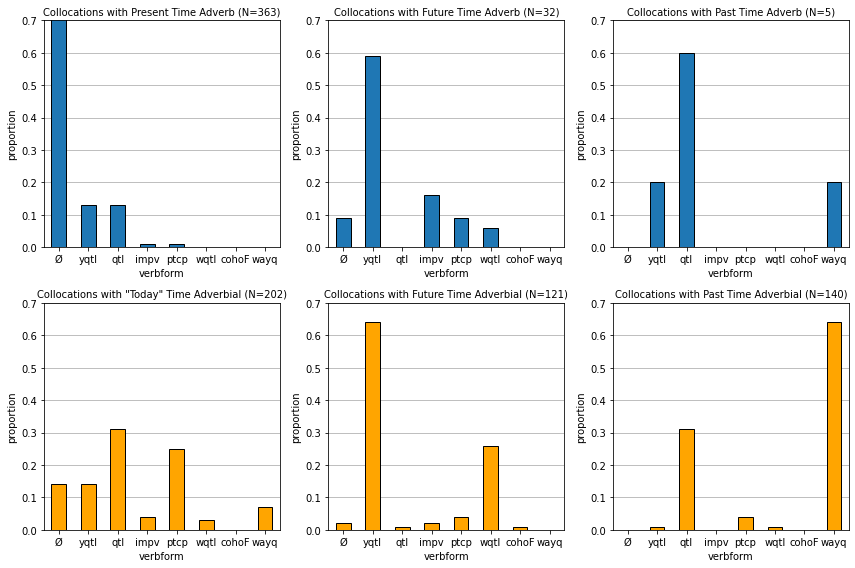

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

tensenames = {'PRES':'Present', 'FUT': 'Future', 'PAST': 'Past'}


i = 0 
for table, kind in ([at_pr, 'Adverb'], [np_pr, 'Adverbial']):
    for tense in table.index:
        ax = axs[i]
        i += 1
        data = table.loc[tense]
        if kind == 'Adverb':
            ct_data = at_counts.loc[tense]
        else:
            ct_data = np_ct.loc[tense]
        tensename = tensenames[tense]
        kwargs = {}
        if tensename == 'Present' and kind == 'Adverbial':
            tensename = '"Today"'
        
        if kind == 'Adverbial':
            kwargs['color'] = 'orange'
            
        data.plot(ax=ax, kind='bar', edgecolor='black', **kwargs)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_title(f'Collocations with {tensename} Time {kind} (N={ct_data.sum()})', size=10)
        ax.set_ylabel('proportion')
        ax.set_ylim((0, 0.7))
        ax.grid(True, axis='y')
        ax.set_axisbelow(True)
fig.tight_layout()

out.plot(
    'advb_np_prs'
)